#Objective
Students will analyze a given dataset to:
1. Identify and resolve dataset issues (missing values, outliers).
2. Perform Exploratory Data Analysis (EDA).
3. Conduct ANOVA analysis.
4. Build and evaluate a Linear Regression model using statsmodels.

In [ ]:
!gdown --id 1fllSNYkXZkDwi3ux_7odr9I1ZQm1iXYV

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1fllSNYkXZkDwi3ux_7odr9I1ZQm1iXYV
To: /content/financial_food_industry.csv
100% 218k/218k [00:00<00:00, 62.0MB/s]


In [ ]:
#important libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# # Load google.colab and mound drive
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# data_path='/content/drive/MyDrive/MS-DSA/DSA-5002/ASSIGNMENT/financial_food_industry.csv'

In [ ]:
data_path='/content/financial_food_industry.csv'

In [ ]:
import pandas as pd
df=pd.read_csv(data_path)

In [ ]:
df

,Revenue,Expense,Profit,Region,Employees,Industry_Type
0,218.543053,168.077353,50.465700,North,181.0,Snacks
1,477.821438,391.179299,86.642139,North,NaN,Beverages
2,379.397274,227.709372,151.687902,East,1014.0,Snacks
3,319.396318,239.531154,79.865164,North,978.0,Snacks
4,120.208388,87.595659,32.612729,North,170.0,Snacks
...,...,...,...,...,...,...
2995,439.383092,339.983276,99.399816,North,1684.0,Bakery
2996,120.772944,84.696636,36.076308,West,NaN,Snacks
2997,189.404537,152.671334,36.733203,North,1984.0,Snacks
2998,180.520489,125.302206,NaN,West,1126.0,Beverages


#1. Dataset Quality Check

#####Step 1.1: Load the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Revenue        2850 non-null   float64
 1   Expense        3000 non-null   float64
 2   Profit         2850 non-null   float64
 3   Region         3000 non-null   object 
 4   Employees      2850 non-null   float64
 5   Industry_Type  3000 non-null   object 
dtypes: float64(4), object(2)
memory usage: 140.8+ KB


In [ ]:
df.describe()

,Revenue,Expense,Profit,Employees
count,2850.000000,3000.000000,2850.000000,2850.000000
mean,274.994835,191.759081,83.342964,1029.720351
std,131.451784,97.948046,53.214966,561.866322
min,50.005236,25.827213,5.539755,50.000000
25%,159.948279,107.821360,40.069490,551.250000
50%,277.353308,187.801134,71.337531,1019.000000
75%,389.856708,263.447901,117.831335,1530.000000
max,499.872953,439.890520,239.979388,1999.000000


In [ ]:
#Summary of categorical columns
df.describe(include='object')

,Region,Industry_Type
count,3000,3000
unique,4,4
top,North,Snacks
freq,772,785


In [ ]:
print(df['Region'].value_counts())
print(df['Industry_Type'].value_counts())

Region
North    772
South    755
East     741
West     732
Name: count, dtype: int64
Industry_Type
Snacks       785
Bakery       753
Dairy        736
Beverages    726
Name: count, dtype: int64


In [ ]:
# 4. check for missing values
df.isnull().sum()

,0
Revenue,150
Expense,0
Profit,150
Region,0
Employees,150
Industry_Type,0


#####Step 1.2: Check for missing values

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#1. Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

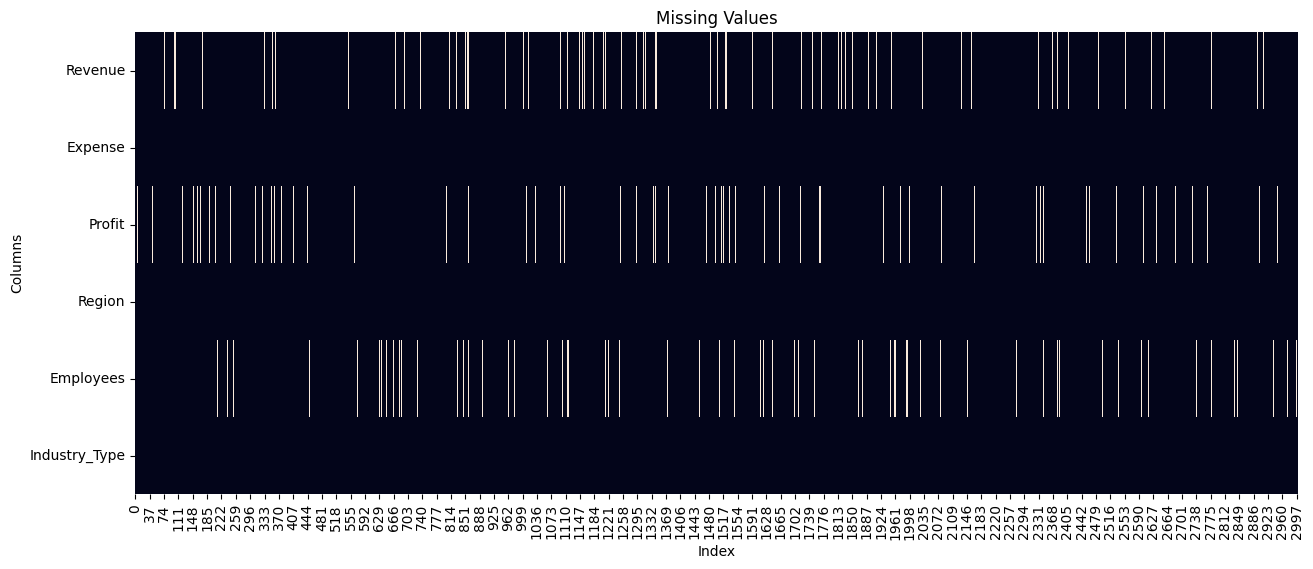

In [ ]:
# ax = plt.axes()
plt.figure(figsize=(15, 6))
sns.heatmap(df.isna().transpose(), cbar=False)
plt.title('Missing Values', fontsize=12)
plt.xlabel('Index', fontsize = 10)
plt.ylabel('Columns', fontsize = 10)
plt.show()

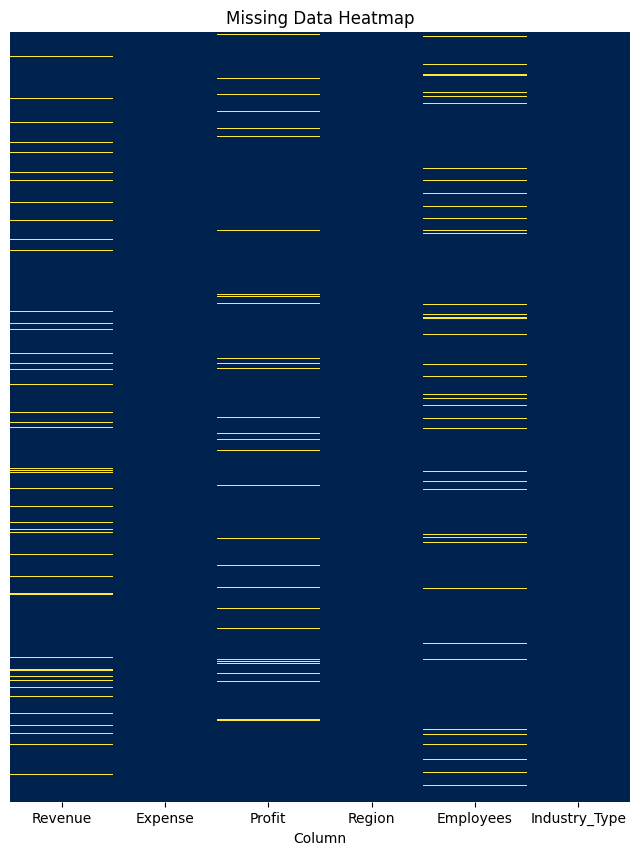

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing missing data using Seaborn's heatmap
plt.figure(figsize=(8, 10))  # Set figure size
sns.heatmap(df.isnull(), cmap='cividis', cbar=False, yticklabels=False, xticklabels=True)

# Show the plot
plt.title("Missing Data Heatmap")
plt.xlabel('Column', fontsize = 10)
plt.show()


**Missing Data Report:**

The dataset has missing values in three variables: *Revenue, Profit, and Employees*. These missing values were identified in the heatmap analysis. Since all three variables are numeric, the missing data will be filled by replacing the NA values with the median.

In [ ]:
# 2. Understand the data
print(f'Dataset Shape: {df.shape}')
print(f'Columns: {df.columns}')

Dataset Shape: (3000, 6)
Columns: Index(['Revenue', 'Expense', 'Profit', 'Region', 'Employees', 'Industry_Type'], dtype='object')


In [ ]:
#Summary of categorical columns
df.describe(include='object')

,Region,Industry_Type
count,3000,3000
unique,4,4
top,North,Snacks
freq,772,785


In [ ]:
# 4. check for missing values
df.isnull().sum()

,0
Revenue,150
Expense,0
Profit,150
Region,0
Employees,150
Industry_Type,0


In [ ]:
# 5. Handle missing values
#Filling missing values in numerical volumns with their median
df.fillna(df.median(numeric_only=True), inplace=True) #inplace=True is used for replace current dataframe

In [ ]:
df.describe()

,Revenue,Expense,Profit,Employees
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,275.112759,191.759081,82.742692,1029.184333
std,128.123257,97.948046,51.933055,547.639730
min,50.005236,25.827213,5.539755,50.000000
25%,166.696413,107.821360,41.697403,577.750000
50%,277.353308,187.801134,71.337531,1019.000000
75%,383.021206,263.447901,114.351597,1509.250000
max,499.872953,439.890520,239.979388,1999.000000


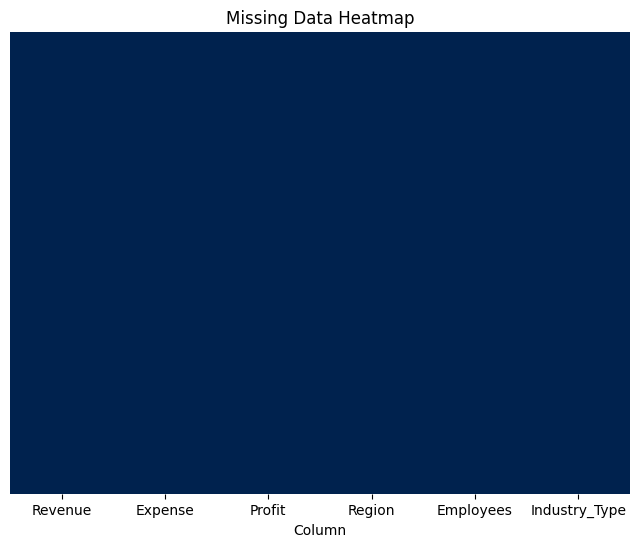

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing missing data using Seaborn's heatmap
plt.figure(figsize=(8, 6))  # Set figure size
sns.heatmap(df.isnull(), cmap='cividis', cbar=False, yticklabels=False, xticklabels=True)

# Show the plot
plt.title("Missing Data Heatmap")
plt.xlabel('Column', fontsize = 10)
plt.show()

#####Step 1.3: Check Check for Outliers

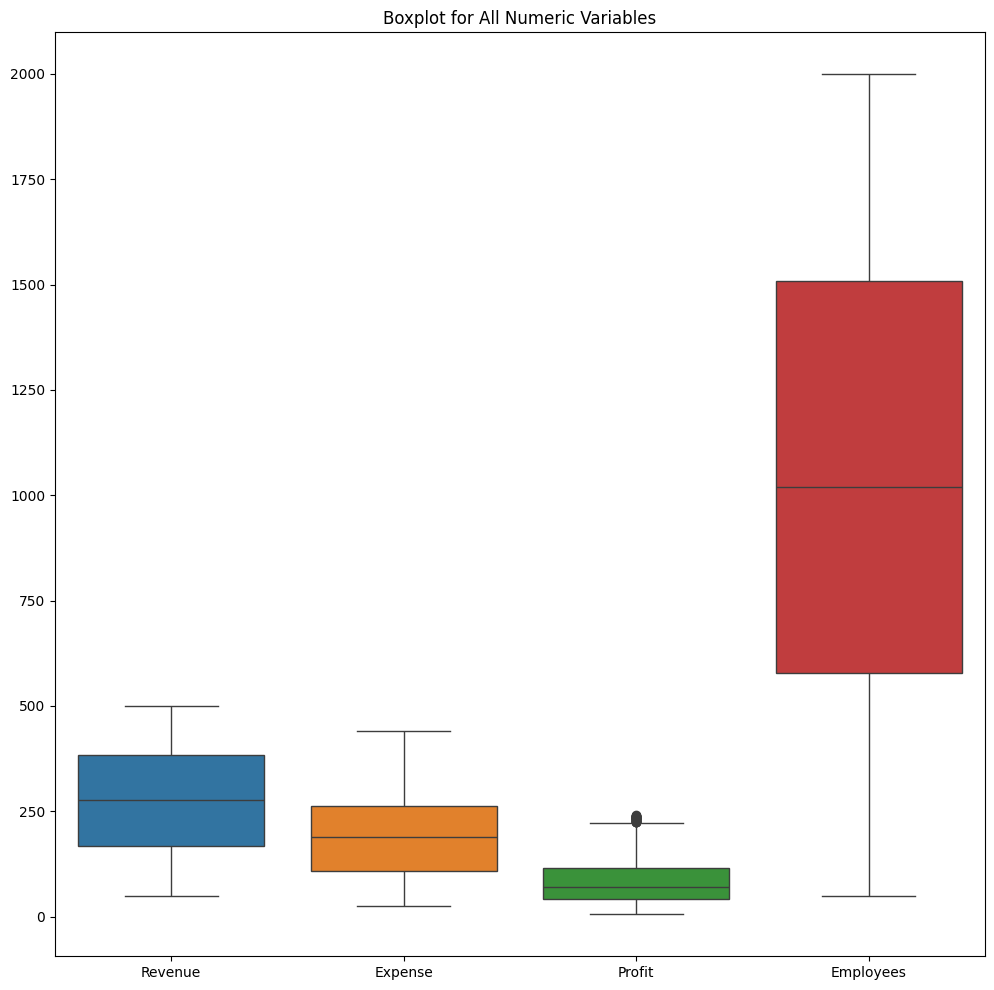

In [ ]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(12, 12))
sns.boxplot(data=df[numeric_columns], orient='v')
plt.title('Boxplot for All Numeric Variables')
plt.show()

**Outlier Detection in Profit:**

---

The boxplot analysis of the Profit variable shows the existence of outliers. These outliers are data points that lie outside the usual range of profit values, suggesting they may represent unusual or extreme profit figures.

In [ ]:
#First quartile
q1=df['Profit'].quantile(0.25)
#Third quartile
q3=df['Profit'].quantile(0.75)
#Interquartile range
iqr=q3-q1
#Lower bound
lower_fence=q1-1.5*iqr
#Upper bound
upper_fence=q3+1.5*iqr

In [ ]:
# Profit Outliers Values Positions
import numpy as np
lf_rm=np.where(df['Profit']<lower_fence)
uf_rm=np.where(df['Profit']>upper_fence)
lf_rm
uf_rm

(array([ 139,  313,  412,  488,  518,  717,  869, 1196, 1209, 1388, 1519,
        1756, 1838, 2027, 2091, 2122, 2527, 2638, 2646, 2738, 2805, 2843,
        2862, 2954, 2985]),)

In [ ]:
#Remove Profit Outliers Values
df_cleaned=df[(df['Profit']>=lower_fence)&(df['Profit']<=upper_fence)]

Text(0.5, 1.0, 'Profit Cleaned Data With No Outliers')

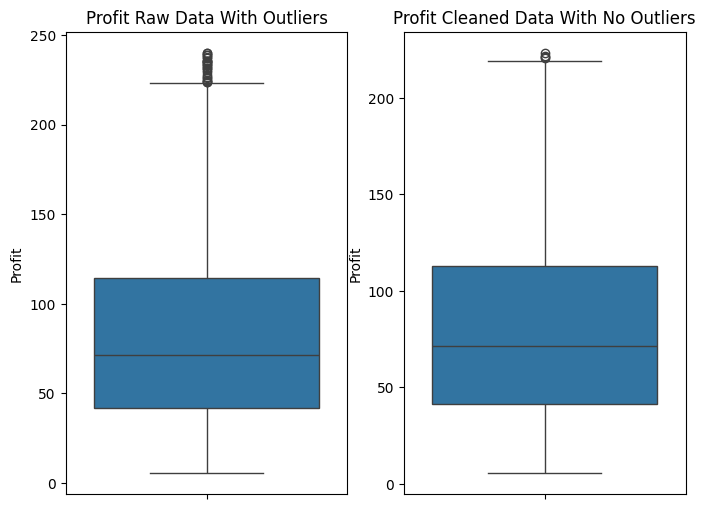

In [ ]:
# Create a figure with a 2x2 grid layout (1 rows, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(8, 6))
#Profit boxplot with outliers
sns.boxplot(df['Profit'],ax=axes[0])
axes[0].set_title('Profit Raw Data With Outliers')
#Profit boxplot with no outliers
sns.boxplot(df_cleaned['Profit'],ax=axes[1])
axes[1].set_title('Profit Cleaned Data With No Outliers')

Text(0.5, 1.0, 'Profit Cleaned Data With No Outliers')

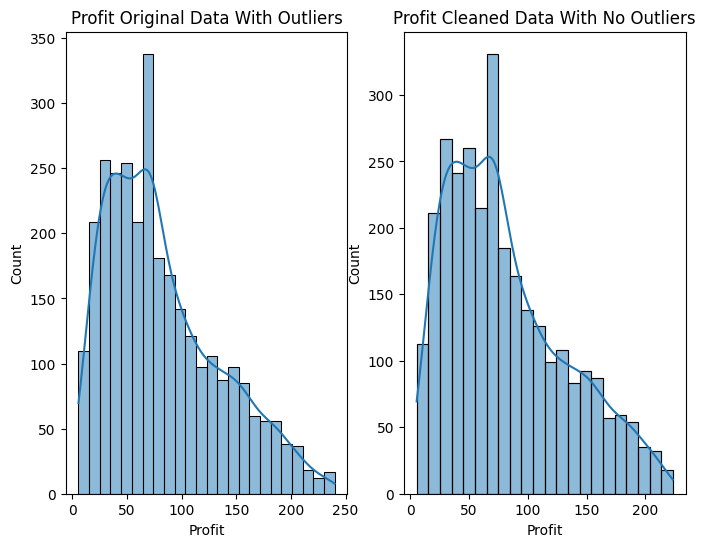

In [ ]:
# Create a figure with a 2x2 grid layout (1 rows, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(8, 6))
#Profit histogram with outliers
sns.histplot(df['Profit'],ax=axes[0],kde=True)
axes[0].set_title('Profit Original Data With Outliers')
#Profit histogram with no outliers
sns.histplot(df_cleaned['Profit'],ax=axes[1],kde=True)
axes[1].set_title('Profit Cleaned Data With No Outliers')

**Outlier Removal in Profit:**

Once the quantile-based method was used to remove outliers, the updated Profit boxplot no longer shows any outliers. The data now falls within a more consistent range, suggesting that the extreme values have been effectively removed.

<Axes: >

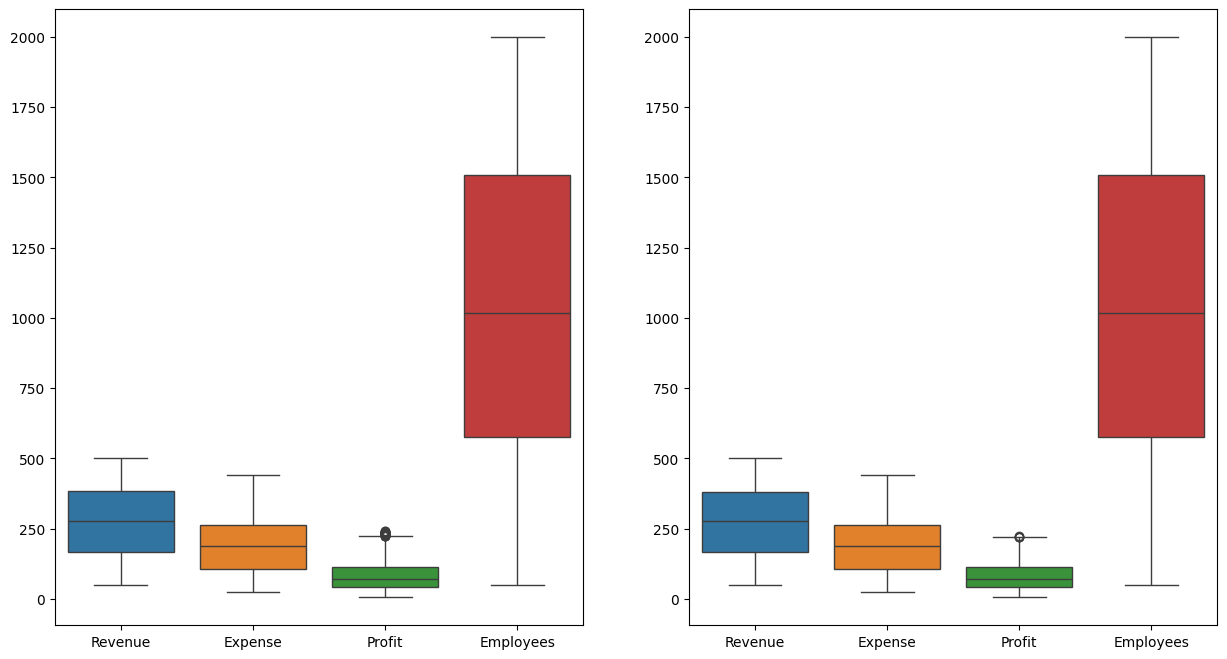

In [ ]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_columns_c = df_cleaned.select_dtypes(include=['number']).columns

# Create a figure with a 2x2 grid layout (1 rows, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
#Profit histogram with outliers
# sns.histplot(df['Profit'],ax=axes[0],kde=True)
sns.boxplot(data=df[numeric_columns],ax=axes[0], orient='v')
# axes[0].set_title('Profit Original Data With Outliers')
#Profit histogram with no outliers
# sns.histplot(df_cleaned['Profit'],ax=axes[1],kde=True)
sns.boxplot(data=df_cleaned[numeric_columns_c],ax=axes[1], orient='v')
# axes[1].set_title('Profit Cleaned Data With No Outliers')

#2. Exploratory Data Analysis (EDA)

#####Step 2.1: Univariate Analysis

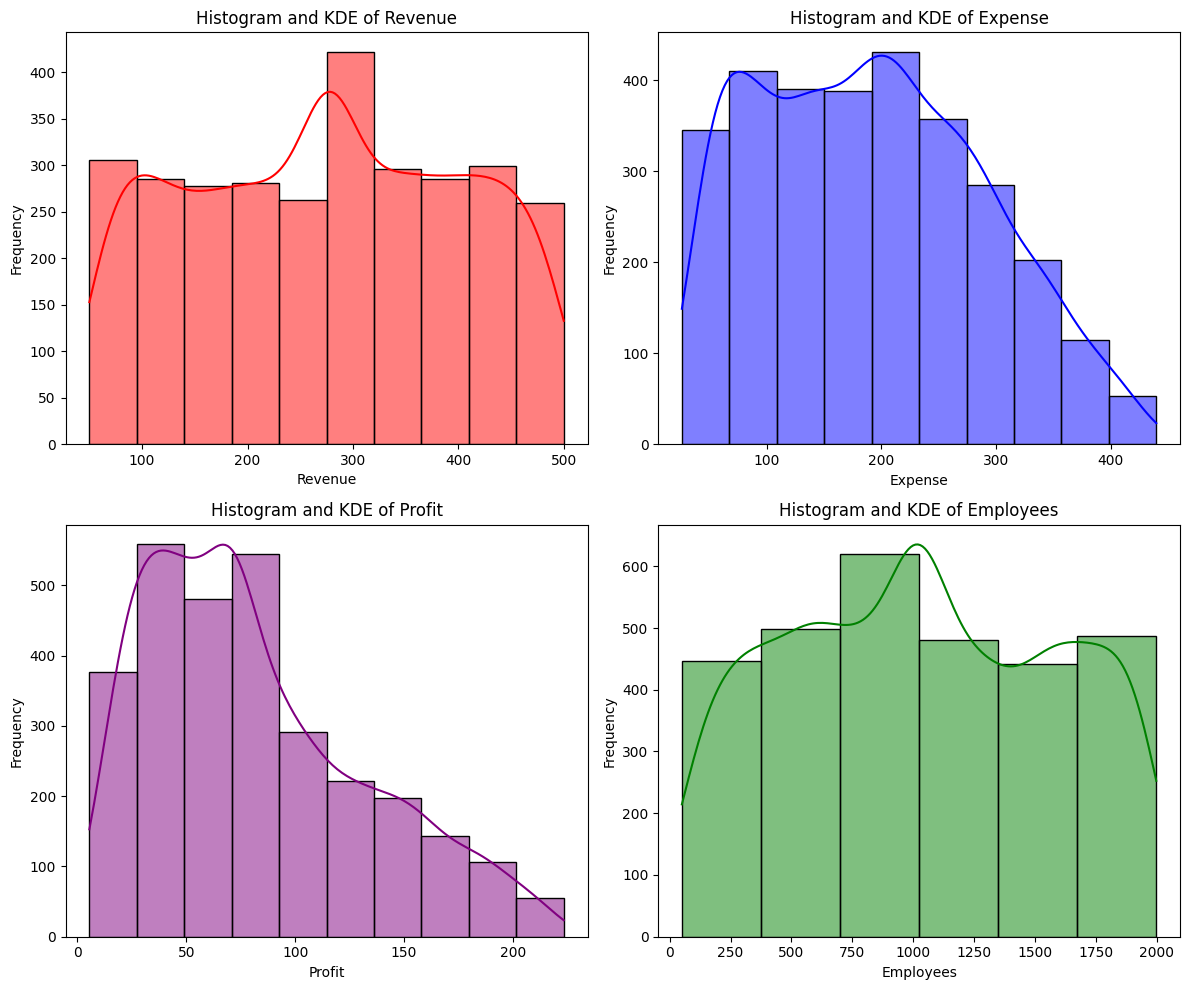

In [ ]:
# Create a figure with a 2x2 grid layout (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# First histogram: Distribution of Revenue
sns.histplot(df_cleaned['Revenue'], bins=10, kde=True, color='red', ax=axes[0, 0])
axes[0, 0].set_title('Histogram and KDE of Revenue')
axes[0, 0].set_xlabel('Revenue')
axes[0, 0].set_ylabel('Frequency')

# Second histogram: Distribution of Expense
sns.histplot(df_cleaned['Expense'], bins=10, kde=True, color='blue', ax=axes[0, 1])
axes[0, 1].set_title('Histogram and KDE of Expense')
axes[0, 1].set_xlabel('Expense')
axes[0, 1].set_ylabel('Frequency')

# Third histogram: Distribution of Profit
sns.histplot(df_cleaned['Profit'], bins=10, kde=True, color='purple', ax=axes[1, 0])
axes[1, 0].set_title('Histogram and KDE of Profit')
axes[1, 0].set_xlabel('Profit')
axes[1, 0].set_ylabel('Frequency')

# Fourth histogram: Distribution of Employees
sns.histplot(df_cleaned['Employees'], bins=6, kde=True, color='green', ax=axes[1, 1])
axes[1, 1].set_title('Histogram and KDE of Employees')
axes[1, 1].set_xlabel('Employees')
axes[1, 1].set_ylabel('Frequency')

# Adjust layout to prevent overlap of labels and titles
plt.tight_layout()

# Show the plot
plt.show()

<ipython-input-30-4a5f03a55b58>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Region', data=df_cleaned, ax=axes[0], palette='viridis')
<ipython-input-30-4a5f03a55b58>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Industry_Type', data=df_cleaned, ax=axes[1], palette='flare')


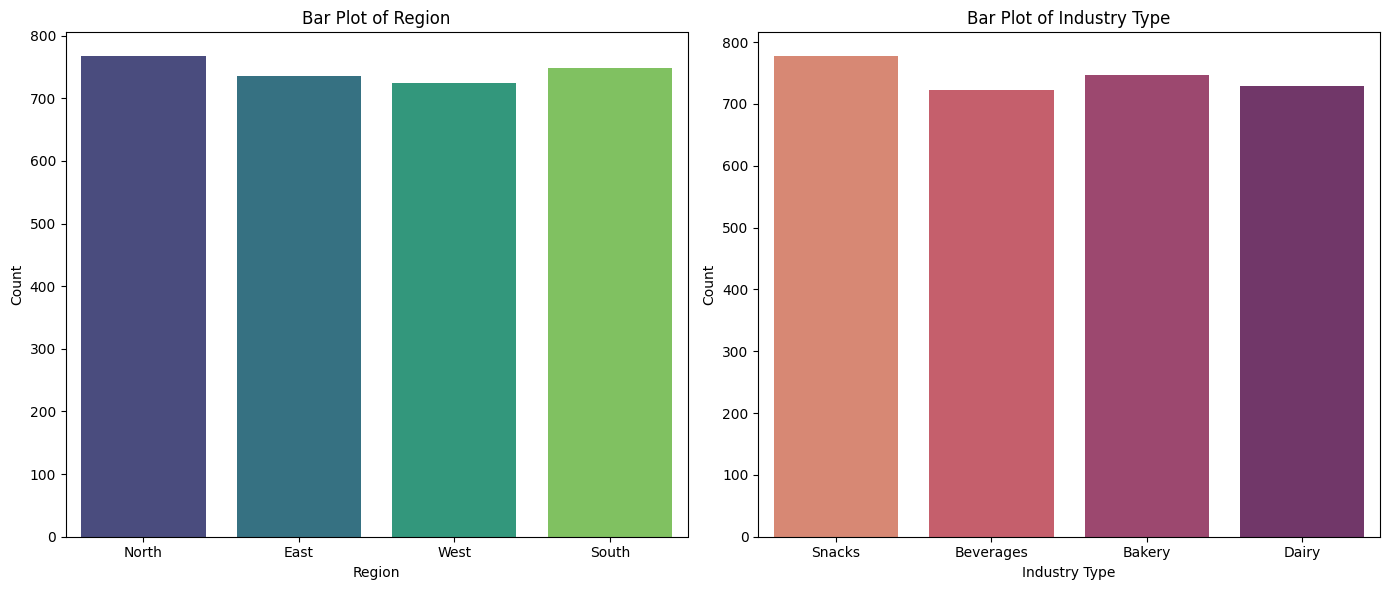

In [ ]:
# Create a figure with a 1x2 grid layout (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot for Region variable (using countplot for categorical data)
sns.countplot(x='Region', data=df_cleaned, ax=axes[0], palette='viridis')
axes[0].set_title('Bar Plot of Region')
axes[0].set_xlabel('Region')
axes[0].set_ylabel('Count')

# Bar plot for Industry_Type variable (using countplot for categorical data)
sns.countplot(x='Industry_Type', data=df_cleaned, ax=axes[1], palette='flare')
axes[1].set_title('Bar Plot of Industry Type')
axes[1].set_xlabel('Industry Type')
axes[1].set_ylabel('Count')

# Adjust layout to prevent overlap of labels and titles
plt.tight_layout()

# Show the plot
plt.show()

#####Step 2.2: Bivariate and Multivariate Analysis

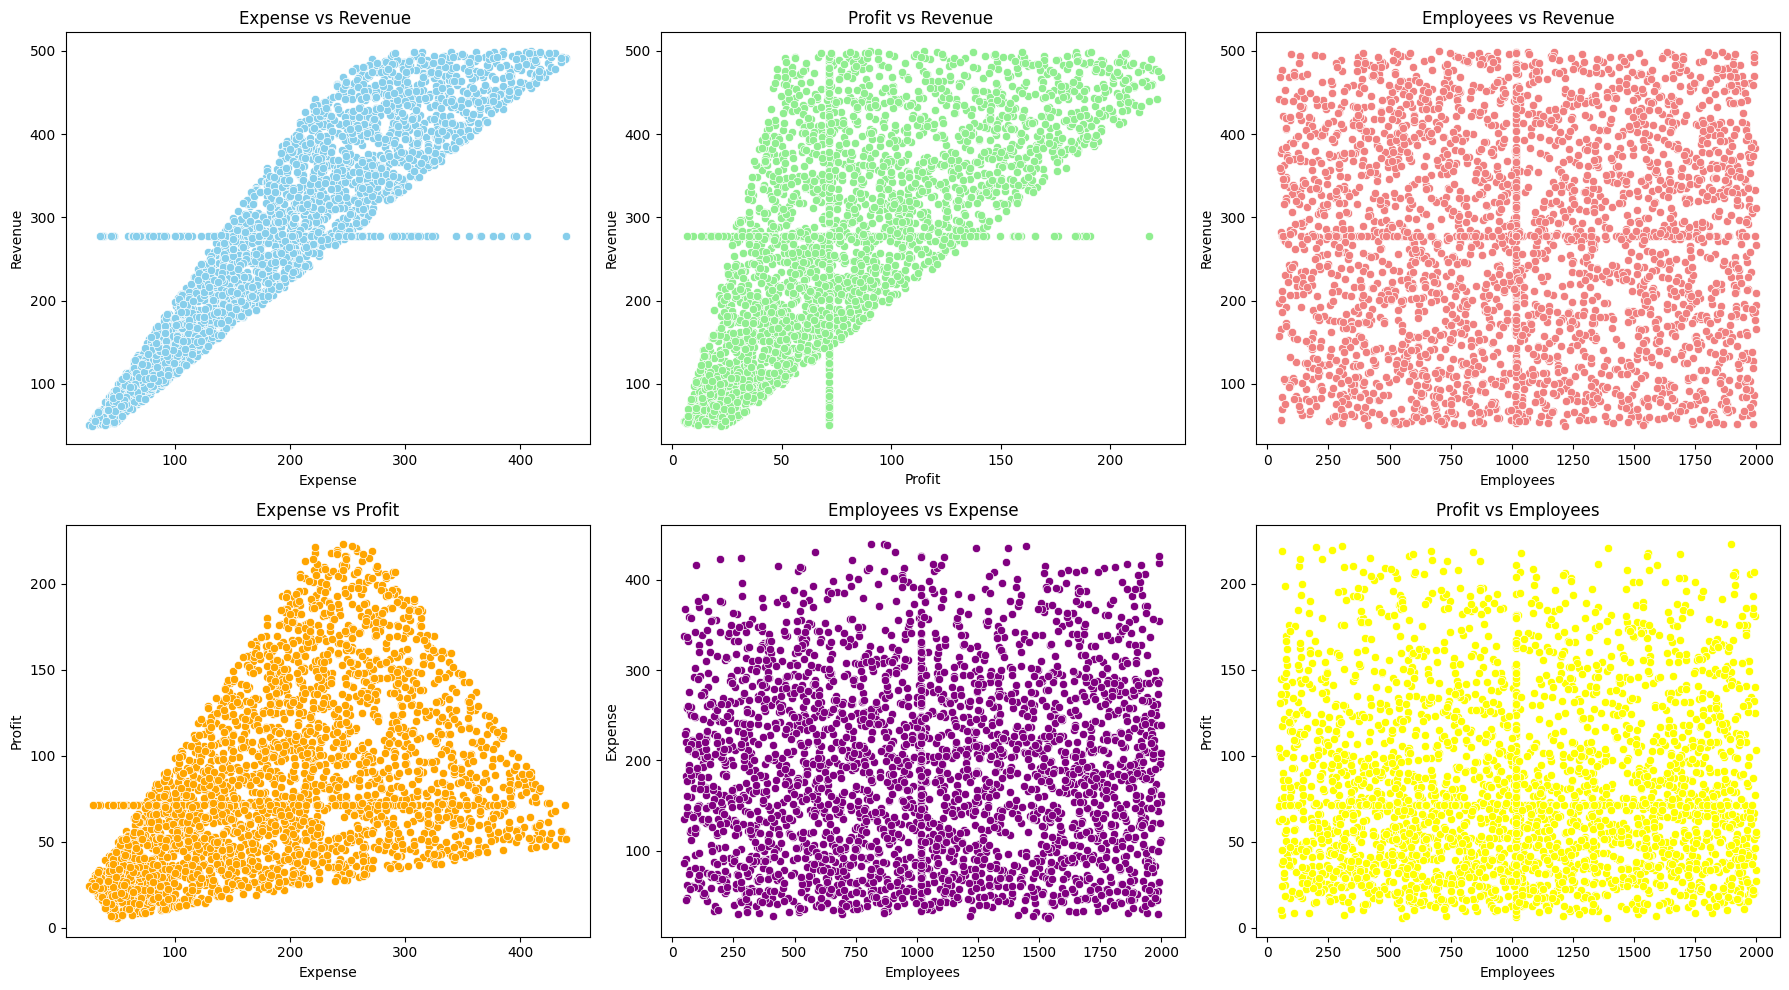

In [ ]:
# Create a figure with a 2x3 grid layout (2 rows, 3 columns) for 6 scatter plots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Plot scatter plots between pairs of variables

# Scatter plot for Revenue vs Expense
sns.scatterplot(x='Expense', y='Revenue', data=df_cleaned, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Expense vs Revenue ')

# Scatter plot for Revenue vs Profit
sns.scatterplot(x='Profit', y='Revenue', data=df_cleaned, ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Profit vs Revenue ')

# Scatter plot for Revenue vs Employees
sns.scatterplot(x='Employees', y='Revenue', data=df_cleaned, ax=axes[0, 2], color='lightcoral')
axes[0, 2].set_title('Employees vs Revenue')

# Scatter plot for Expense vs Profit
sns.scatterplot(x='Expense', y='Profit', data=df_cleaned, ax=axes[1, 0], color='orange')
axes[1, 0].set_title('Expense vs Profit')

# Scatter plot for Expense vs Employees
sns.scatterplot(x='Employees', y='Expense', data=df_cleaned, ax=axes[1, 1], color='purple')
axes[1, 1].set_title('Employees vs Expense')

# Scatter plot for Profit vs Employees
sns.scatterplot(x='Employees', y='Profit', data=df_cleaned, ax=axes[1, 2], color='yellow')
axes[1, 2].set_title('Profit vs Employees')

# Adjust layout to prevent overlap of labels and titles
plt.tight_layout()

# Show the plot
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

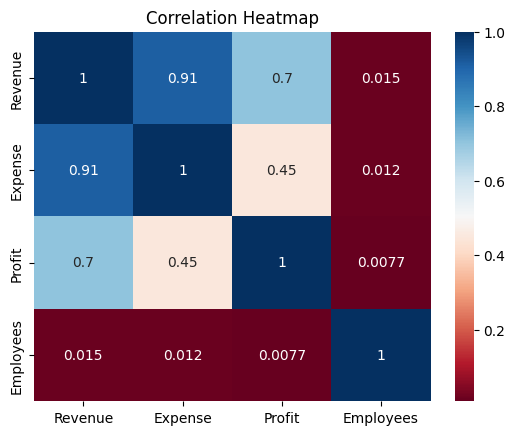

In [ ]:
#Correlation Heatmap
correlation_matrix=df_cleaned.corr(numeric_only=True)
sns.heatmap(correlation_matrix,annot=True,cmap='RdBu')
plt.title('Correlation Heatmap')

#####Step 2.3: Derive insights from EDA.

In [ ]:
df_cleaned.describe()

,Revenue,Expense,Profit,Employees
count,2975.000000,2975.000000,2975.000000,2975.000000
mean,273.374753,191.273905,81.484728,1029.889748
std,127.241635,98.212593,50.294419,547.928197
min,50.005236,25.827213,5.539755,50.000000
25%,166.065002,106.635950,41.565439,577.000000
50%,277.353308,186.705763,71.337531,1019.000000
75%,379.821389,264.059570,112.799134,1510.500000
max,499.872953,439.890520,223.280989,1999.000000




*  **Expenses**  
 $Q_1$=107    ;    $Q_3$=264

---

In this dataset, the majority of companies (at least 50%) have expenses between 107 and 264. The distribution of expenses is moderate, with a fairly broad interquartile range of 157. Expenses generally fall within the range of 107 to 264, and only a few observations are expected to exceed 499.5, which could potentially be considered outliers.

*  **Profit**   
$Q_1$=42    ;    $Q_3$=113

---
Profit Range: The central 50% of companies in the dataset have profits between 42 and 113, with a moderate range of 71 between the first and third quartiles.

Profit Distribution: The majority of companies are likely earning moderate profits, while a few are performing exceptionally well, with profits exceeding 113.

### **Bivariate-Findings**
**Expense vs Revenue:** There is a positive correlation between expenses and revenue, meaning that as expenses rise, revenue tends to rise as well.

**Profit vs Revenue:** While higher revenue typically results in higher profit, there can be some fluctuations.

**Employees vs Revenue:** There is no clear correlation between the number of employees and the revenue.

**Expense vs Profit:** Although higher expenses can lead to higher profits, the relationship varies considerably.

**Employees vs Expense:** The number of employees does not have a strong connection to the level of expenses.

**Profit vs Employees:** The number of employees does not significantly influence profit.

**Key Insight:** Revenue and expenses, as well as revenue and profit, are closely linked, while employee count has minimal impact on key financial metrics like revenue, expenses, or profit.

#2. ANOVA Analysis

###  • Visualization-Industry Type


Text(0.5, 1.0, 'Employees Readings Across Industry Type')

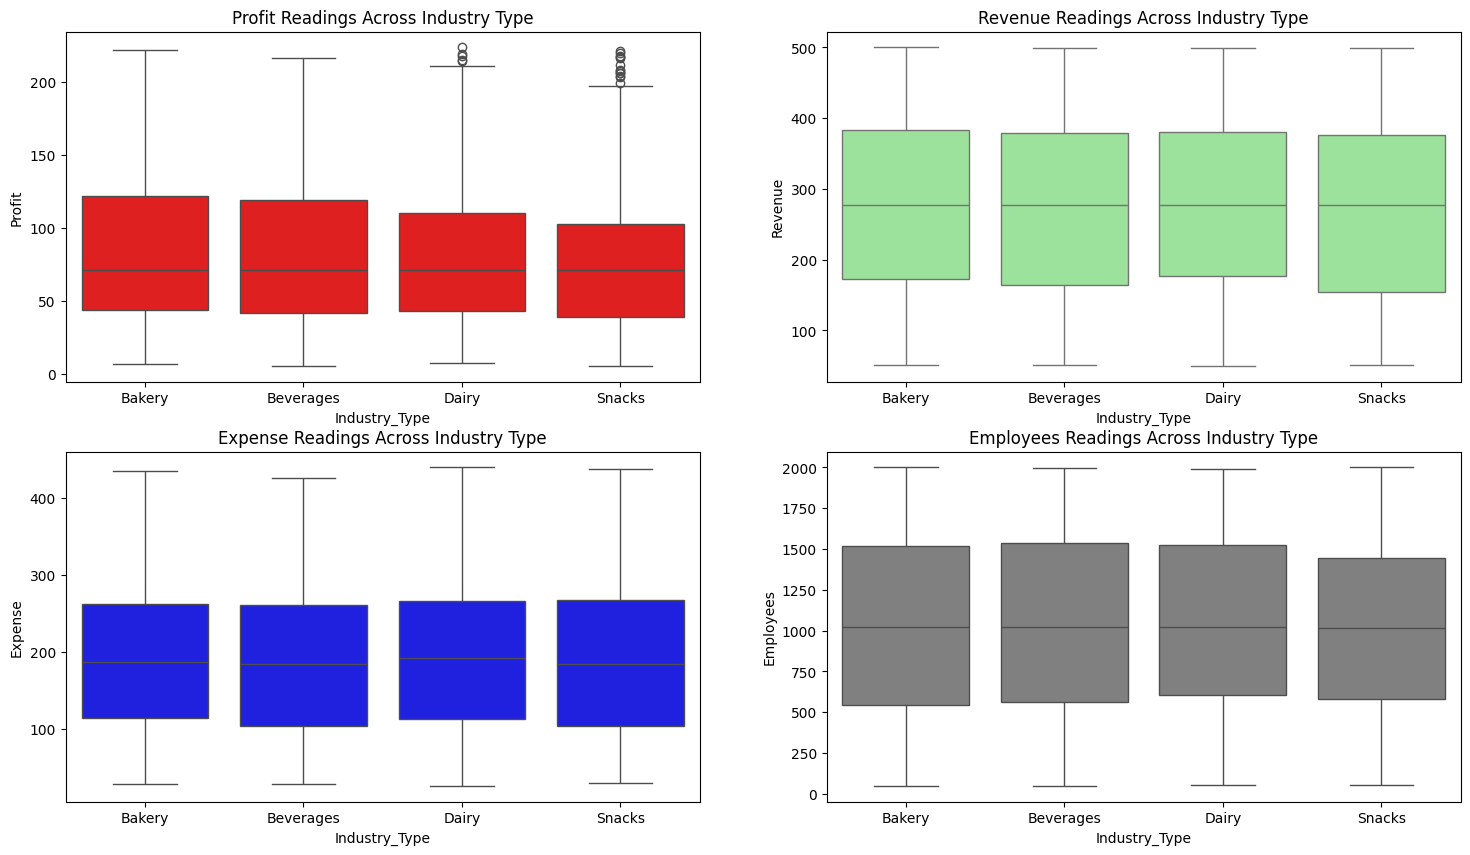

In [ ]:
# Visualization
# Create a figure with a 2x3 grid layout (2 rows, 2 columns) for 6 box plots
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

#Boxplot for profit readings across industry type
sns.boxplot(x='Industry_Type',y='Profit',data=df_cleaned,ax=axes[0,0],color='red')
axes[0, 0].set_title('Profit Readings Across Industry Type')

#Boxplot for revenue readings across industry type
sns.boxplot(x='Industry_Type',y='Revenue',data=df_cleaned,ax=axes[0,1],color='lightgreen')
axes[0, 1].set_title('Revenue Readings Across Industry Type')

#Boxplot for expense readings across industry type
sns.boxplot(x='Industry_Type',y='Expense',data=df_cleaned,ax=axes[1,0],color='blue')
axes[1, 0].set_title('Expense Readings Across Industry Type')

##Boxplot for employees readings across industry type
sns.boxplot(x='Industry_Type',y='Employees',data=df_cleaned,ax=axes[1,1],color='gray')
axes[1, 1].set_title('Employees Readings Across Industry Type')

###Findings **Visualizaion-Summary**
---



* Boxplots visually suggest differences in **Profit across industry types.**

* ANOVA confirms whether these differences are statistically significant.

* If the p-value from ANOVA is low, it validates that Profit does indeed vary by Industry Type.

###Step 3.1: Define the groups.

In [ ]:
df_cleaned['Industry_Type']=df_cleaned['Industry_Type'].astype('category')

#Group profit readings by Industry type
profit_readings=[
    df_cleaned[df_cleaned['Industry_Type']==Industry_Type]['Profit'] for
    Industry_Type in df_cleaned['Industry_Type'].unique()
]

<ipython-input-36-c28bbeab637e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Industry_Type']=df_cleaned['Industry_Type'].astype('category')


### Step 3.2: Perform ANOVA.

In [ ]:
#Performing one-way ANOVA
anova_result=  f_oneway(*profit_readings)

print('\nOne-Way-ANOVA-Results:')
print(f"F-statistic:{anova_result.statistic: .4f}, p-value:{anova_result.pvalue:.4e}")

#Interpretation
if anova_result.pvalue <0.05:
  print("There is a signicant difference in profit readings between industry type.")
else:
  print("There is no signicant difference in profit readings between industry type")


One-Way-ANOVA-Results:
F-statistic: 3.2208, p-value:2.1803e-02
There is a signicant difference in profit readings between industry type.


### • Visualization-Region

Text(0.5, 1.0, 'Employees Readings Across Region')

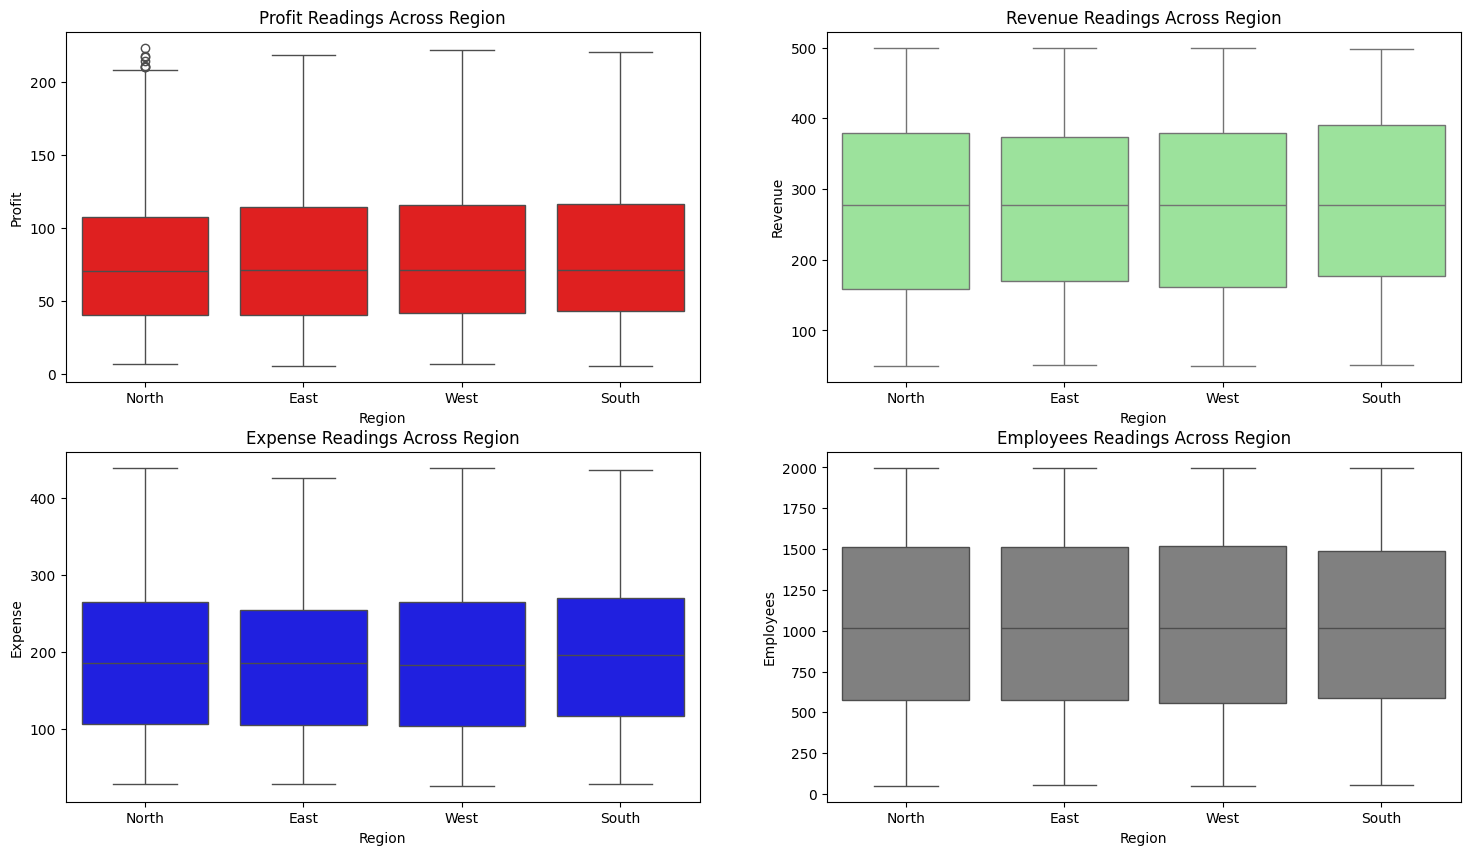

In [ ]:
# Visualization
# Create a figure with a 2x3 grid layout (2 rows, 2 columns) for 6 box plots
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

#Boxplot for profit readings across region
sns.boxplot(x='Region',y='Profit',data=df_cleaned,ax=axes[0,0],color='red')
axes[0,0].set_title('Profit Readings Across Region')

#Boxplot for revenue readings across region
sns.boxplot(x='Region',y='Revenue',data=df_cleaned,ax=axes[0,1],color='lightgreen')
axes[0,1].set_title('Revenue Readings Across Region')

#Boxplot for expense readings across region
sns.boxplot(x='Region',y='Expense',data=df_cleaned,ax=axes[1,0],color='blue')
axes[1,0].set_title('Expense Readings Across Region')

#Boxplot for employees readings across region
sns.boxplot(x='Region',y='Employees',data=df_cleaned,ax=axes[1,1],color='gray')
axes[1,1].set_title('Employees Readings Across Region')

###Findings **Visualizaion-Summary**


---
* Based on the boxplots, Region does not seem to have a significant impact on Profit, Revenue, Expense, or Employees.

* Therefore, further statistical analysis (e.g., ANOVA) may not be necessary for these metrics with respect to Region.


#   4.Linear Regression and Hypothesis Testing

### • Step 4.1: Define target (Y) and feature (X) variables.

### There are three possible models.

### After reviewing all aspects, I decided to use this particular model.


$$Revenue=β0+β1×Expense+β2×Profit+ε$$       $$ R^2:0.91$$

---




Why not go with this model?



$$Revenue=β0+β1×Expense+ε$$       $$ R^2:0.83$$

$$Profit=β0+β1×Revenue+β2×Expense+ε$$       $$ R^2:0.72$$




### • Step 4.2: Build the regression model.

In [ ]:
x = df_cleaned[['Expense','Profit']] # Features
y = df_cleaned['Revenue']  # Target
x_with_constant=sm.add_constant(x)
model=sm.OLS(y,x_with_constant).fit()
model_summary=model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                 2.453e+04
Date:                Fri, 17 Jan 2025   Prob (F-statistic):               0.00
Time:                        10:54:10   Log-Likelihood:                -14380.
No. Observations:                2975   AIC:                         2.877e+04
Df Residuals:                    2972   BIC:                         2.878e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.9473      1.307      9.138      0.0

###### $$R^2:0.94$$

---



 An R-squared value of 0.94 means that the model explains 94% of the variability in **Revenue** using **Expense** and **Profit**. This is considered a very good fit, indicating that the model does a great job of predicting Revenue based on the two predictors.



######   **Fitted Model**
**$$Revenue=12+ 0.96 ×Expense+0.93 ×Profit+ε$$**

---




**$$Intercept (β0 = 12):$$**

This value represents the expected value of Revenue when both Expense and Profit are 0. So, when both Expense and Profit are 0, the model predicts the Revenue will be 12 units.

**$$Slope (β1 = 0.96):$$**

This indicates that for each unit increase in Expense, Revenue is expected to increase by 0.96 units, holding Profit constant.


**$$Slope (β2 = 0.93):$$**

Similarly, this means that for each unit increase in Profit, Revenue is expected to increase by 0.93 units, holding Expense constant.

### • Step 4.3: Perform hypothesis testing.

In [ ]:
#ho:β1=0   vs ha:β1≠0
p_value=model.pvalues['Expense']
print("\n----Hypotjesis_Testing--------")
print(f"p_value_for_Expense:{p_value:.4f}")

if p_value <0.05:
  print("Result:-----Reject_the_null_hypothesis-------\nwhich means expense significantly affects revenue")
else:
  print("Result:--------Fail_to_Reject_the_null_hypothesis------\nwhich means expense no significantly affects revenue")


----Hypotjesis_Testing--------
p_value_for_Expense:0.0000
Result:-----Reject_the_null_hypothesis-------
which means expense significantly affects revenue


In [ ]:
#ho:β2=0   vs ha:β2≠0
p_value=model.pvalues['Profit']
print("\n----Hypotjesis_Testing--------")
print(f"p_value_for_Profit:{p_value:.4f}")

if p_value <0.05:
  print("Result:-----Reject_the_null_hypothesis-------\nwhich means profit significantly affects revenue")
else:
  print("Result:--------Fail_to_Reject_the_null_hypothesis------\nwhich means profit no significantly affects revenue")


----Hypotjesis_Testing--------
p_value_for_Profit:0.0000
Result:-----Reject_the_null_hypothesis-------
which means profit significantly affects revenue


####  Checking Absence Of Mutlicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculate VIF for each feature
features = df_cleaned[['Expense','Profit']]
vif = pd.DataFrame()
vif['Feature'] = features.columns
vif['VIF'] = [variance_inflation_factor(features.values, i) for i in range(len(features.columns))]
print(vif)

   Feature      VIF
0  Expense  3.95838
1   Profit  3.95838


**Interpretation of VIF Results:**

---


The Variance Inflation Factor (VIF) values for both Expense and Profit are 3.96, which indicates low to moderate multicollinearity between the predictors. Since VIF values below 5 are considered acceptable, **there is no significant issue with multicollinearity in this model.**

#### Checking Homoscedasticity

In [ ]:
y_pred = model.predict(x_with_constant)
residuals = y - y_pred

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan

test_stat, p_value, f_value, f_p_value = het_breuschpagan(residuals, x_with_constant)

print("\n----Homoscedasticity_Testing--------")
print(f"Breusch-Pagan p-value:{p_value:.4f}")

if p_value <0.05:
  print("Result::Reject_the_null_hypothesis\nThere is  evidence of heteroscedasticity ")
else:
  print("Result::Fail_to_Reject_the_null_hypothesis\nThere is no evidence of heteroscedasticity  ")


----Homoscedasticity_Testing--------
Breusch-Pagan p-value:0.7085
Result::Fail_to_Reject_the_null_hypothesis
There is no evidence of heteroscedasticity  


**Comment:**

---


The variability of the residuals is consistent across all levels of the independent variables, and the assumption of homoscedasticity is not violated.

#### Checking Residuals Follows Normality or Not

---

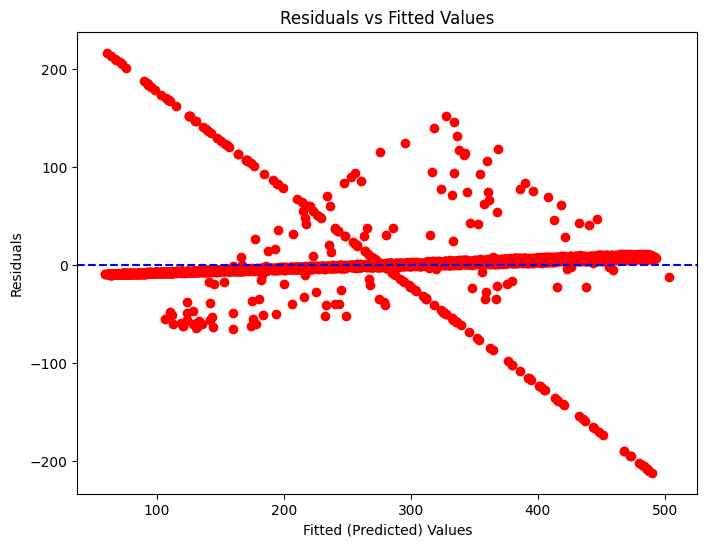

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='red')
plt.axhline(0, color='blue', linestyle='--')  # Add horizontal line at 0
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted (Predicted) Values')
plt.ylabel('Residuals')
plt.show()

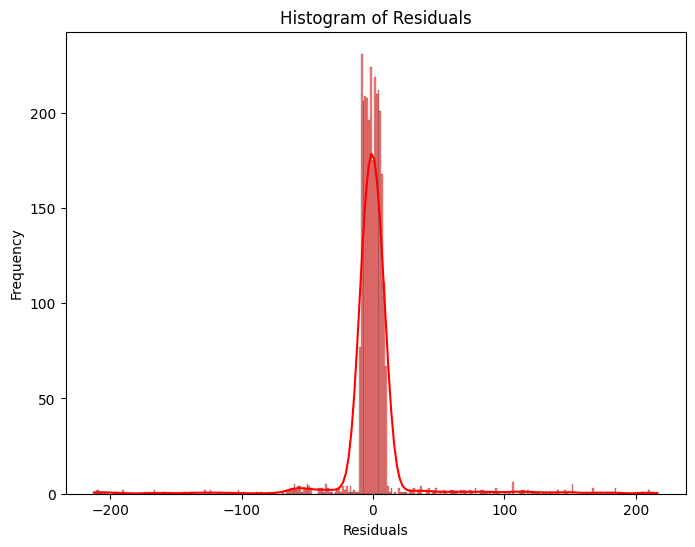

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='red')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

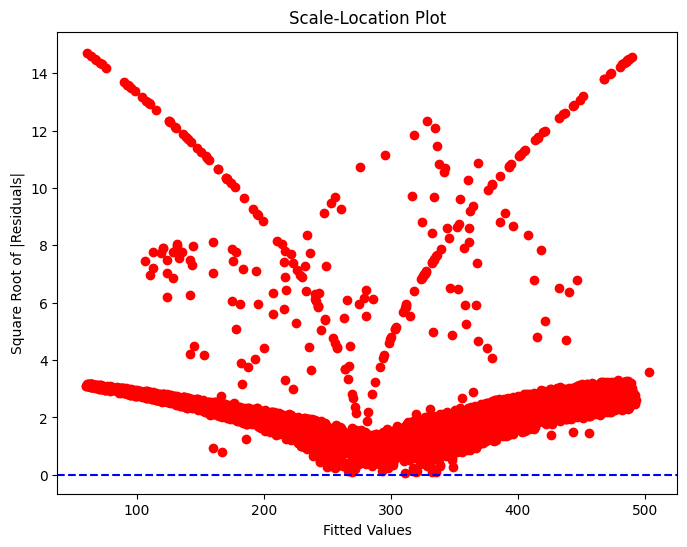

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, np.sqrt(np.abs(residuals)), color='red')
plt.axhline(0, color='blue', linestyle='--')
plt.title('Scale-Location Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Square Root of |Residuals|')
plt.show()

#### Q-Q Plot Of Residuals

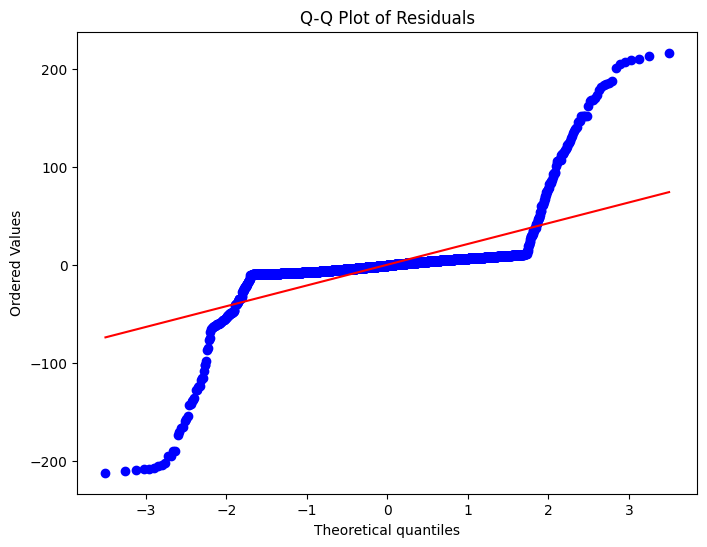

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

**Interpretation of QQ Plot:**

---



The QQ plot of the residuals shows that the points do not closely follow a straight line, indicating that the residuals do not follow a normal distribution. This suggests that the normality assumption for the residuals may not be fully met in this model.



In [ ]:
from scipy.stats import shapiro
stat, p_value = shapiro(residuals)
print("\n----Normality_Testing--------")
print(f"Shapiro-Wilk Test Statistic: {stat}, p-value: {p_value:.4f}")

if p_value <0.05:
  print("Result::Reject_the_null_hypothesis\nThe residuals do not follow a normal distribution")
else:
  print("Result::Fail_to_Reject_the_null_hypothesis\nThe residuals follow a normal distribution  ")


----Normality_Testing--------
Shapiro-Wilk Test Statistic: 0.48651305448185733, p-value: 0.0000
Result::Reject_the_null_hypothesis
The residuals do not follow a normal distribution


**Interpretation of Shapiro-Wilk Test:**

---



The Shapiro-Wilk test p-value is 0.0000, which is less than 0.05. This indicates that the residuals do not follow a normal distribution. The normality assumption is violated, suggesting that the model's residuals are not normally distributed.

#### **Handling Non-Normal Residuals in Linear Regression**

---


Linear regression assumes that residuals follow a normal distribution. However, non-normal residuals are common in practice, even after transformations.

If the model is used for prediction, normality of residuals is less critical, as it typically does not affect predictive accuracy.For prediction tasks, focus on model performance rather than strict adherence to normality.

However, for inference, non-normal residuals can invalidate statistical tests and p-values. To address this, robust regression methods, such as bootstrap regression, can be used to provide more reliable coefficients and confidence intervals (CIs) despite non-normality.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.utils import resample


# Define the features and target variable
X = df_cleaned[['Expense', 'Profit']]
y = df_cleaned['Revenue']

# Fit the initial linear regression model
model = LinearRegression()
model.fit(X, y)

# Original model coefficients
print("Original model coefficients:")
print(f"Intercept: {model.intercept_}")
print(f"Expense coefficient: {model.coef_[0]}")
print(f"Profit coefficient: {model.coef_[1]}")

# Function to perform bootstrapping
def bootstrap_regression(X, y, model, n_iterations):
    bootstrapped_coefs = []

    for _ in range(n_iterations):
        # Resample the data with replacement
        X_resampled, y_resampled = resample(X, y, n_samples=len(X), random_state=123)

        # Fit the model on the resampled data
        model.fit(X_resampled, y_resampled)

        # Store the coefficients of the resampled model
        bootstrapped_coefs.append(model.coef_)

    return np.array(bootstrapped_coefs)

# Perform bootstrapping with 1000 iterations
n_iterations = 1000
bootstrapped_coefs = bootstrap_regression(X, y, model, n_iterations)

# Calculate confidence intervals for the coefficients (2.5% and 97.5% percentiles)
lower_percentile = np.percentile(bootstrapped_coefs, 2.5, axis=0)
upper_percentile = np.percentile(bootstrapped_coefs, 97.5, axis=0)

# Print the bootstrapped confidence intervals for each coefficient
print("\nBootstrapped 95% Confidence Intervals for Coefficients:")
print(f"Expense coefficient: ({lower_percentile[0]:.3f}, {upper_percentile[0]:.3f})")
print(f"Profit coefficient: ({lower_percentile[1]:.3f}, {upper_percentile[1]:.3f})")

Original model coefficients:
Intercept: 11.947262723230835
Expense coefficient: 0.9685241317276583
Profit coefficient: 0.9348266801394965

Bootstrapped 95% Confidence Intervals for Coefficients:
Expense coefficient: (0.975, 0.975)
Profit coefficient: (0.939, 0.939)


###Step 4.4: Interpret the results.

**Comment:**

---


Both expense and profit positively affect the dependent variable. Each unit increase in expense or profit increases the dependent variable by approximately 0.97 and 0.93 units.


The bootstrapped 95% confidence intervals for the coefficients are:

**Expense: (0.975, 0.975)**

**Profit: (0.939, 0.939)**

These intervals indicate that the estimates for the expense and profit coefficients are precise, with very little uncertainty in their values. The narrow intervals suggest strong confidence in the stability of these coefficient estimates.